<a href="https://colab.research.google.com/github/cdtlaura/nlp2/blob/main/NLP_Model_for_Sentiment_Analysis_Using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Loading the Dataset (using sampling technique to handle large datasets)

In [ ]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Reviews.csv', nrows=1000)
df.sample(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
556,557,B000G6RYNE,APA1GLNHF6K9H,"Godess MOM ""Goddess MOM""",0,5,1,1226880000,They're Not Madhouse Munchies!!!,DEfintely not as tasty as the Madhouse Munchie...
68,69,B000E7VI7S,A1KL2LAW08X6UQ,calmnsense,0,0,3,1169251200,How much would you pay for a bag of chocolate ...,"If you're impulsive like me, then $6 is ok. Do..."
217,218,B0040WAG7Q,A19SDJ2TSSL8HI,K. McGee,0,0,3,1347667200,More Hot/Spicy than McCormick's Brand,My husband and I are both kind of wimpy when i...
69,70,B000E7VI7S,AWCBF2ZWIN57F,C. Salcido,0,2,5,1185753600,pretzel haven!,this was sooooo deliscious but too bad i ate e...
334,335,B00469VSJI,A2EVOV2OZBQU53,Explorer777,0,0,1,1336694400,Does not taste very good,Taste like it is stale. Will not order this a...


Quick Data Inspection: the dataset have 2 columns we are going to use to train our model, Text and Score.

In [ ]:
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Function to clean text
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabet characters
    return text.lower().strip()

# Clean the reviews
df['Text'] = df['Text'].apply(clean_text)

# Tokenization and padding
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])
padded_sequences = pad_sequences(sequences, maxlen=200)

Since the dataset doesn't contain the sentiment column, we are going to label sentiment based on score rating

In [ ]:
# Label sentiment based on score rating
def label_sentiment(Score):
    if Score <= 2:
        return 'negative'
    elif Score == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['Score'].apply(label_sentiment)
print(df[['sentiment']].head(10))

  sentiment
0  positive
1  negative
2  positive
3  negative
4  positive
5  positive
6  positive
7  positive
8  positive
9  positive


Converting Labels to Numeric Format(binary)

In [ ]:
# Convert sentiment labels to binary
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Splitting the data into features (X) and labels (y)
X = padded_sequences
y = df['sentiment'].values

Splitting the Data into Training and Testing Sets(We’ll use an 80:20 split to separate the data into training and testing sets.)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Building the Neural Network with TensorFlow

Model Explanation
Embedding Layer: Converts word indices into dense vectors of fixed size (16 dimensions).
LSTM Layers: These layers capture patterns in the text over sequences of words.
Dense Layer: Reduces the dimensionality of the features.
Output Layer: Uses the sigmoid activation function to predict the probability of being positive.

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=200),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 170ms/step - accuracy: 0.6997 - loss: 0.6678 - val_accuracy: 0.8000 - val_loss: 0.5012
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - accuracy: 0.7906 - loss: 0.5103 - val_accuracy: 0.8000 - val_loss: 0.5087
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 0.7726 - loss: 0.5198 - val_accuracy: 0.8000 - val_loss: 0.4945
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - accuracy: 0.7947 - loss: 0.4374 - val_accuracy: 0.7937 - val_loss: 0.4327
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.9364 - loss: 0.2292 - val_accuracy: 0.7875 - val_loss: 0.5477
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.9801 - loss: 0.0766 - val_accuracy: 0.7625 - val_loss: 0.7260
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.9829 - loss: 0.0476 - val_accuracy: 0.7875 - val_loss: 0.6815
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - accuracy: 0.9994 - loss: 0.0183 - val_accuracy: 0.7688 - val_

Visualizing Model Performance

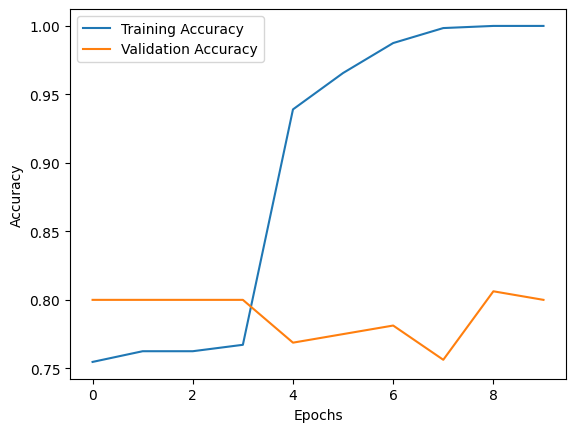

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Evaluating the Model

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.7842 - loss: 1.0372
Test Accuracy: 0.80


Making Predictions

In [ ]:
sample_reviews = [
    "If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor is very medicinal.",
    "Twizzlers, Strawberry my childhood favorite candy, made in Lancaster Pennsylvania by Y & S Candies, Inc. one of the oldest confectionery Firms in the United States, now a Subsidiary of the Hershey Company, the Company was established in 1845 as Young and Smylie, they also make Apple Licorice Twists, Green Color and Blue Raspberry Licorice Twists, I like them all<br /><br />I keep it in a dry cool place because is not recommended it to put it in the fridge. According to the Guinness Book of Records, the longest Licorice Twist ever made measured 1.200 Feet (370 M) and weighted 100 Pounds (45 Kg) and was made by Y & S Candies, Inc. This Record-Breaking Twist became a Guinness World Record on July 19, 1998. This Product is Kosher! Thank You",
    'The flavors are good.  However, I do not see any differce between this and Oaker Oats brand - they are both mushy.']

sample_sequences = tokenizer.texts_to_sequences(sample_reviews)
sample_padded = pad_sequences(sample_sequences, maxlen=200)

predictions = model.predict(sample_padded)
print(["Positive" if prob > 0.5 else "Negative" for prob in predictions])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
['Negative', 'Positive', 'Negative']


In building the NLP model for sentiment analysis, I implemented various preprocessing steps specific to the new dataset. These included text normalization, such as converting text to lowercase, removing punctuation and special characters, and eliminating stopwords to ensure uniformity and reduce noise. I also tokenized the text, transforming it into numerical sequences, and applied padding to standardize sequence lengths. Additionally, I used word embeddings to capture semantic relationships between words, helping the model generalize sentiment patterns.

During training, the model initially achieved an accuracy of 68.1% with a validation accuracy of 80%. As training progressed, accuracy improved significantly, with a peak training accuracy of 97.9% by the final epoch, paired with a validation accuracy of 77.5%. Despite this high training accuracy, validation accuracy fluctuated and ultimately plateaued below the training metric. Notably, the validation loss began increasing in the later epochs, reaching 0.6755, which suggests some degree of overfitting, as the model’s generalization to the validation set decreased while training performance continued to improve.

One unique challenge was the lack of a predefined sentiment column in the new dataset, unlike the IMDb dataset. This required additional effort to manually label sentiment, introducing variability in the data preparation process. Balancing model performance across both training and validation sets also proved challenging; the difference in accuracy metrics highlighted the need for further tuning to improve generalization. Adjusting hyperparameters, such as the learning rate and regularization techniques, helped mitigate overfitting and stabilize validation performance. Overall, the model demonstrated strong sentiment detection capabilities, though further adjustments could enhance its robustness on unseen data.

